# Example script for how to generate data

### Import packages

In [34]:
from simulator import VariationalAutoencoder, save_dict_pickle, load_dict_pickle, mark_data_missing_by_target
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data scaler and Varational Autoencoder

In [35]:
data_scaler_path = '20200108_data_scaler.pickle'
model_path = '20200108_simulation_model_weights.h5'
out_data_path = '20200108_simulated_data.pickle'

In [3]:
loaded_dict = load_dict_pickle(data_scaler_path)
loaded_dict.keys()

dict_keys(['data_scaler', 'col_names', 'y_col_name', 'p0_um', 'p1_um'])

### Load Michigan Medicine missing rate

* p0_um is the missing rate for class 0
* p1_um is the missing rate for class 1

In [4]:
p0_um = loaded_dict['p0_um']
p1_um = loaded_dict['p1_um']

In [5]:
data_scaler = loaded_dict['data_scaler']

In [6]:
data_scaler

In [7]:
vae = VariationalAutoencoder()

In [8]:
vae.X_colnames = loaded_dict['col_names']
vae.Y_colname = loaded_dict['y_col_name']

In [9]:
vae.load(model_path)

### Simulate data

* Create new train, validation and testing data

In [13]:
X_train_complete, Y_train_complete = vae.simulate(50000,as_df=True)
X_val_complete, Y_val_complete = vae.simulate(10000,as_df=True)
X_test_complete, Y_test_complete = vae.simulate(50000,as_df=True)

### Recale (Autoencoder was fit on scaled data)

* Unscale to have the same mean and variance as PICTURE's training cohort

In [14]:
X_train_complete = data_scaler.inverse_transform(X_train_complete)
X_val_complete = data_scaler.inverse_transform(X_val_complete)
X_test_complete = data_scaler.inverse_transform(X_test_complete)

### Add missingness

In [16]:
X_train_um, Y_train_um = mark_data_missing_by_target(X_train_complete, Y_train_complete, p0_um, p1_um)
X_val_um, Y_val_um = mark_data_missing_by_target(X_val_complete, Y_val_complete, p0_um, p1_um)
X_test_um, Y_test_um = mark_data_missing_by_target(X_test_complete, Y_test_complete, p0_um, p1_um)

### Explore

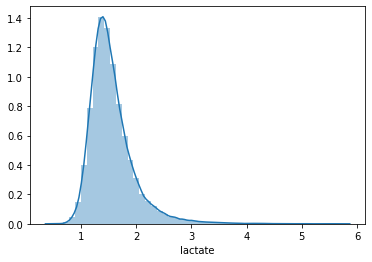

In [19]:
sns.distplot(X_train_complete.lactate)

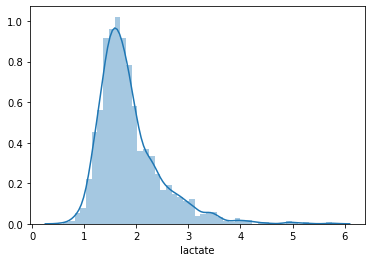

In [23]:
sns.distplot(X_train_complete[Y_train_complete == 1].lactate)

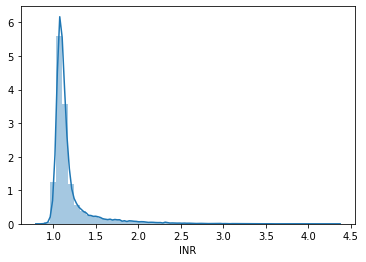

In [20]:
sns.distplot(X_train_complete.INR)

15.0

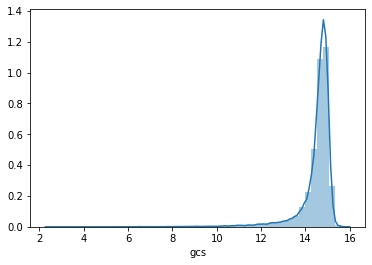

In [21]:
sns.distplot(X_train_complete.gcs)
np.floor(X_train_complete.gcs.max())

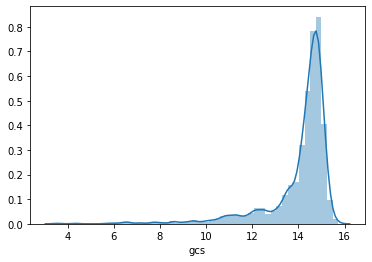

In [24]:
sns.distplot(X_train_complete[Y_train_complete == 1].gcs)

In [25]:
data_scaler.scaler.mean_

array([ 19.08855222,   0.73930436, 120.6701087 ,  36.78524023,
       293.21317163,  84.38275269,   2.38593402,  92.96568189,
        86.50743236,  57.36368198,  20.88103441,   8.96185652,
       104.37369734,  26.18266187,   1.13414614, 124.77073474,
        35.1461767 ,  11.68772393,  29.58636599,  33.18456075,
        89.1140694 ,  10.21259544,   4.19785669,   3.96534481,
        14.82148741, 138.47001379,  14.27621343,   9.1997451 ,
         1.0728196 ,   1.94133273,   3.58886738,   1.56601331,
         1.21902488,  28.50347282,  12.74256076,   1.70153418,
        83.9888312 , 228.3039116 ,  41.64574328,  12.19380347,
         0.44196338,   4.54272299,   3.66919146,   6.44354363,
        66.25305184])

In [27]:
y_train_complete.mean()

0.02876

In [32]:
X_train_um[Y_train_um == 1].isna().mean()

resp                         0.013196
shock_indexes                0.015396
systolics                    0.011730
temperature                  0.060117
urine                        0.301320
MAP                          0.013196
o2_24h_max                   0.005132
spo2_24hr_min                0.012463
pulse                        0.013930
AGE_AT_START_OF_ENCOUNTER    0.000000
bun                          0.179619
calcium                      0.168622
chloride                     0.142962
co2                          0.187683
creatinine                   0.162023
glucose                      0.129765
hematocrit                   0.158358
hemoglobin                   0.155425
mean_corps_hgb               0.158358
mean_corps_hgb_conc          0.167155
mean_corps_hgb_vol           0.172287
mean_platelet_vol            0.235337
potassium                    0.120968
red_blood_cell_count         0.159091
red_cell_dist_width          0.165689
sodium                       0.133431
gcs         

In [30]:
p0_um

resp                         0.010842
shock_indexes                0.011698
systolics                    0.007726
temperature                  0.068533
urine                        0.398194
MAP                          0.007726
o2_24h_max                   0.000841
spo2_24hr_min                0.009726
pulse                        0.006523
AGE_AT_START_OF_ENCOUNTER    0.000000
bun                          0.308136
calcium                      0.299323
chloride                     0.291583
co2                          0.302411
creatinine                   0.296772
glucose                      0.227877
hematocrit                   0.265100
hemoglobin                   0.283321
mean_corps_hgb               0.283480
mean_corps_hgb_conc          0.283480
mean_corps_hgb_vol           0.283321
mean_platelet_vol            0.299033
potassium                    0.263868
red_blood_cell_count         0.283321
red_cell_dist_width          0.283915
sodium                       0.264491
gcs         

In [31]:
p1_um

resp                         0.011055
shock_indexes                0.016433
systolics                    0.012847
temperature                  0.076486
urine                        0.292501
MAP                          0.012847
o2_24h_max                   0.004482
spo2_24hr_min                0.012250
pulse                        0.011353
AGE_AT_START_OF_ENCOUNTER    0.000000
bun                          0.172094
calcium                      0.166716
chloride                     0.149089
co2                          0.183448
creatinine                   0.165521
glucose                      0.121004
hematocrit                   0.155363
hemoglobin                   0.161936
mean_corps_hgb               0.161936
mean_corps_hgb_conc          0.161936
mean_corps_hgb_vol           0.161637
mean_platelet_vol            0.226770
potassium                    0.128473
red_blood_cell_count         0.161637
red_cell_dist_width          0.164625
sodium                       0.128772
gcs         

### Save

In [37]:
save_dict_pickle(path=out_data_path,
                X_train_complete=X_train_complete,
                X_val_complete=X_val_complete,
                X_test_complete=X_test_complete,
                Y_train_complete=Y_train_complete,
                Y_val_complete=Y_val_complete,
                Y_test_complete=Y_test_complete,
                X_train_um=X_train_um,
                X_val_um=X_val_um,
                X_test_um=X_test_um,
                Y_train_um=Y_train_um,
                Y_val_um=Y_val_um,
                Y_test_um=Y_test_um
                )